In [20]:
#!pip3 install pandas numpy seaborn scipy matplotlib plotly tensorflow scikit-learn

#### Importing Modules

In [21]:
import os

# Third Party modules
from pyspark.sql import SparkSession


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

[42.         42.03157895 42.06315789 42.09473684 42.12631579 42.15789474
 42.18947368 42.22105263 42.25263158 42.28421053 42.31578947 42.34736842
 42.37894737 42.41052632 42.44210526 42.47368421 42.50526316 42.53684211
 42.56842105 42.6       ]
[-0.00958348 -0.00371318 -0.0221267  -0.02392413  0.01625052  0.0271248
 -0.0014402   0.02007066  0.00723272 -0.0129024   0.00722791  0.03076073
 -0.00071652  0.03129287 -0.0523949   0.01643805  0.00174094 -0.00598015
  0.00183522 -0.03975138]


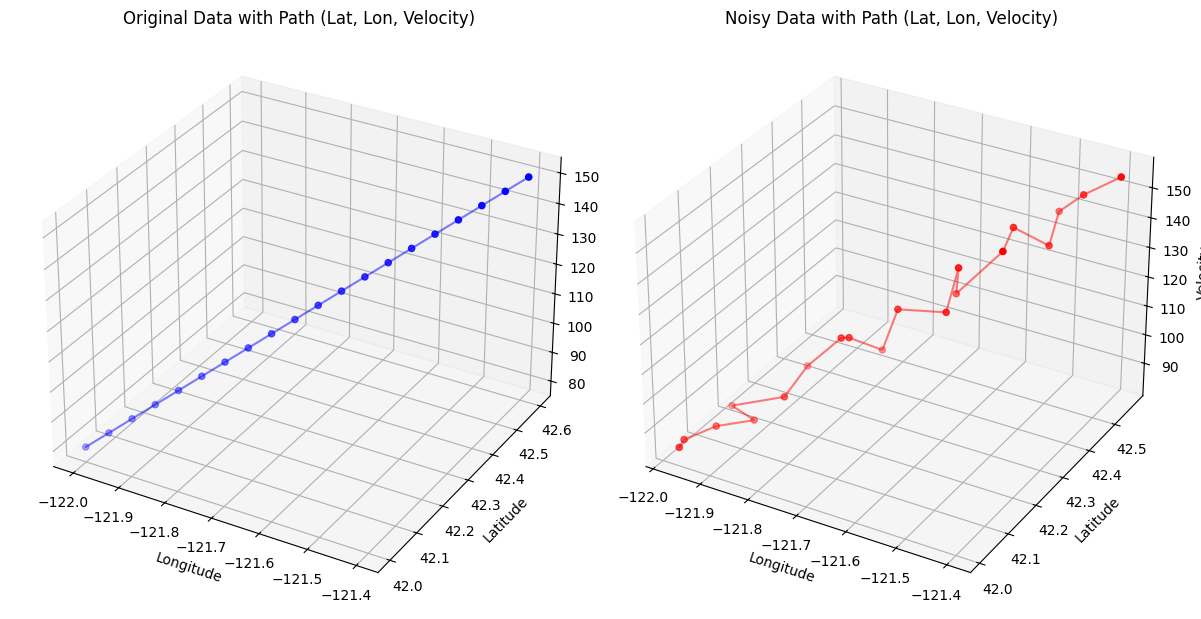

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import Akima1DInterpolator

# Generate original data for lat, lon, and velocity
num_points = 20
lat_original = np.linspace(42.0, 42.6, num_points)
lon_original = np.linspace(-122.0, -121.4, num_points)
velocity_original = np.linspace(80.0, 150.0, num_points)

# Generate noisy or irregular data for lat, lon, and velocity
np.random.seed(42)  # For reproducibility
lat_noisy = np.linspace(42.0, 42.6, num_points) + np.random.normal(0, 0.02, num_points)
lon_noisy = np.linspace(-122.0, -121.4, num_points) + np.random.normal(0, 0.02, num_points)
velocity_noisy = np.linspace(80.0, 150.0, num_points) + np.random.normal(0, 5.0, num_points)

print(lat_original)
print(np.random.normal(0, 0.02, num_points))


# Ensure lat_noisy is sorted and apply the same sorting order to lon_noisy and velocity_noisy
sorting_order = np.argsort(lat_noisy)
lat_noisy = lat_noisy[sorting_order]
lon_noisy = lon_noisy[sorting_order]
velocity_noisy = velocity_noisy[sorting_order]

# Create Akima interpolators for noisy data
akima_interpolator_lat = Akima1DInterpolator(lat_noisy, lat_noisy)
akima_interpolator_lon = Akima1DInterpolator(lat_noisy, lon_noisy)
akima_interpolator_velocity = Akima1DInterpolator(lat_noisy, velocity_noisy)

# Generate smoothed interpolated points for noisy data
num_interpolated_points = 100
lat_interpolated = np.linspace(min(lat_noisy), max(lat_noisy), num_interpolated_points)
lon_interpolated = akima_interpolator_lon(lat_interpolated)
velocity_interpolated = akima_interpolator_velocity(lat_interpolated)

# Create 3D plots for original and noisy data with paths
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot original data with path
ax1.scatter(lon_original, lat_original, velocity_original, c='blue', label='Original Data')
ax1.plot(lon_original, lat_original, velocity_original, c='blue', alpha=0.5, label='Path')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Velocity')
ax1.set_title('Original Data with Path (Lat, Lon, Velocity)')

# Plot noisy data with path
ax2.scatter(lon_noisy, lat_noisy, velocity_noisy, c='red', label='Noisy Data')
ax2.plot(lon_noisy, lat_noisy, velocity_noisy, c='red', alpha=0.5, label='Path')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Velocity')
ax2.set_title('Noisy Data with Path (Lat, Lon, Velocity)')

plt.tight_layout()
plt.show()

#### Implement Akima Interpolation for 1 flight

In [23]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import asc


# Create a Spark session
spark = SparkSession.builder \
    .appName("Rogue Generator") \
    .getOrCreate()

flights_file_path = os.path.join('dataset', 'raw', '0d02a8', '0d02a8_0.parquet')

read_one_flight = spark.read.parquet(flights_file_path, header=True)

In [24]:
selected_df = read_one_flight.select('time', 'icao24', 'lat', 'lon', 'velocity') \
                        .orderBy(asc('time'))

In [25]:
selected_df.show(5)

+----------+------+-----------------+------------------+------------------+
|      time|icao24|              lat|               lon|          velocity|
+----------+------+-----------------+------------------+------------------+
|1645229867|0d02a8|30.18530894134004|-95.45196533203125|145.94713719703776|
|1645229868|0d02a8|30.18530894134004|-95.45196533203125|145.94713719703776|
|1645229869|0d02a8|30.18530894134004|-95.45196533203125|145.94713719703776|
|1645229870|0d02a8|30.18530894134004|-95.45196533203125|145.94713719703776|
|1645229871|0d02a8|30.18530894134004|-95.45196533203125|145.94713719703776|
+----------+------+-----------------+------------------+------------------+
only showing top 5 rows



In [26]:
# Convert the PySpark DataFrame to a Pandas DataFrame
convered_flight = selected_df.toPandas()

In [27]:
convered_flight.isnull().sum()

time        0
icao24      0
lat         0
lon         0
velocity    0
dtype: int64

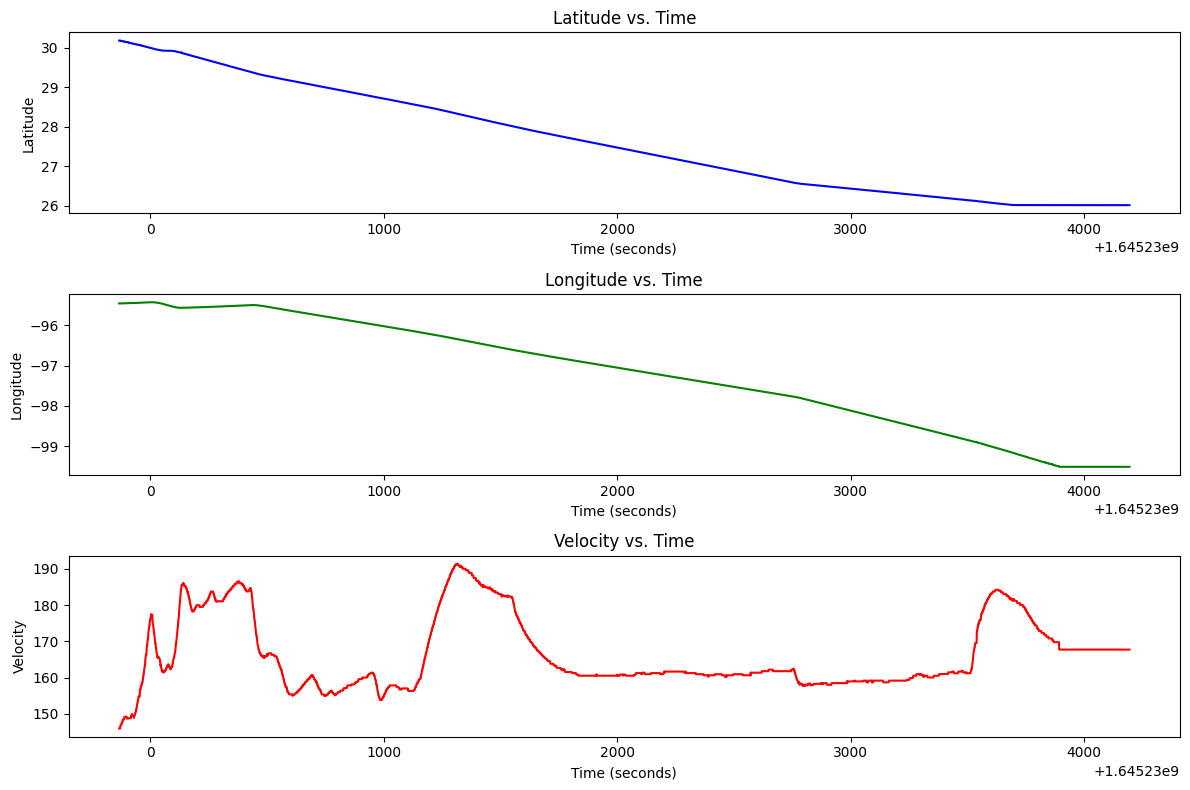

In [28]:
# Create subplots for 'lat', 'lon', and 'velocity'
plt.figure(figsize=(12, 8))

# Latitude vs. Time
plt.subplot(3, 1, 1)
plt.plot(convered_flight['time'], convered_flight['lat'], label='Latitude', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Latitude')
plt.title('Latitude vs. Time')

# Longitude vs. Time
plt.subplot(3, 1, 2)
plt.plot(convered_flight['time'], convered_flight['lon'], label='Longitude', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Longitude')
plt.title('Longitude vs. Time')

# Velocity vs. Time
plt.subplot(3, 1, 3)
plt.plot(convered_flight['time'], convered_flight['velocity'], label='Velocity', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity')
plt.title('Velocity vs. Time')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

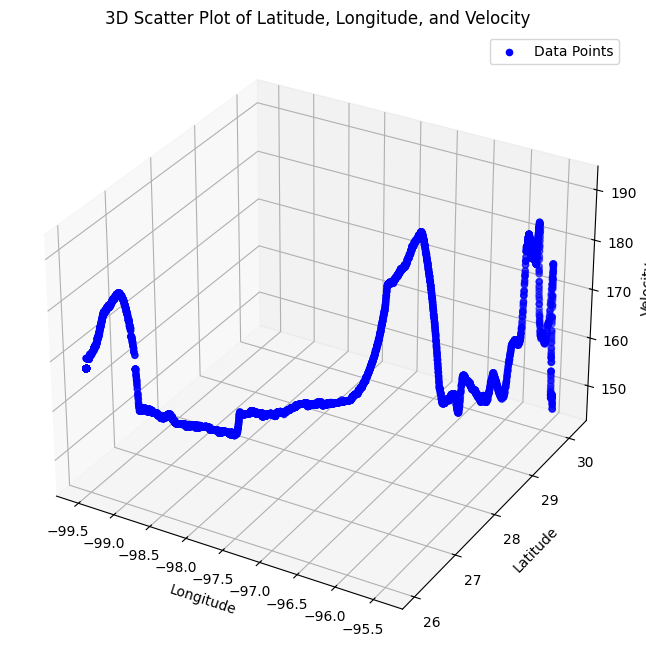

In [29]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 'lat', 'lon', and 'velocity'
ax.scatter(convered_flight['lon'], convered_flight['lat'], convered_flight['velocity'], 
           c='blue', 
           marker='o', 
           label='Data Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Velocity')
ax.set_title('3D Scatter Plot of Latitude, Longitude, and Velocity')

# Display the plot
plt.legend()
plt.show()

#### Introduce Akima Interpolation for Noise

30.18530894134004


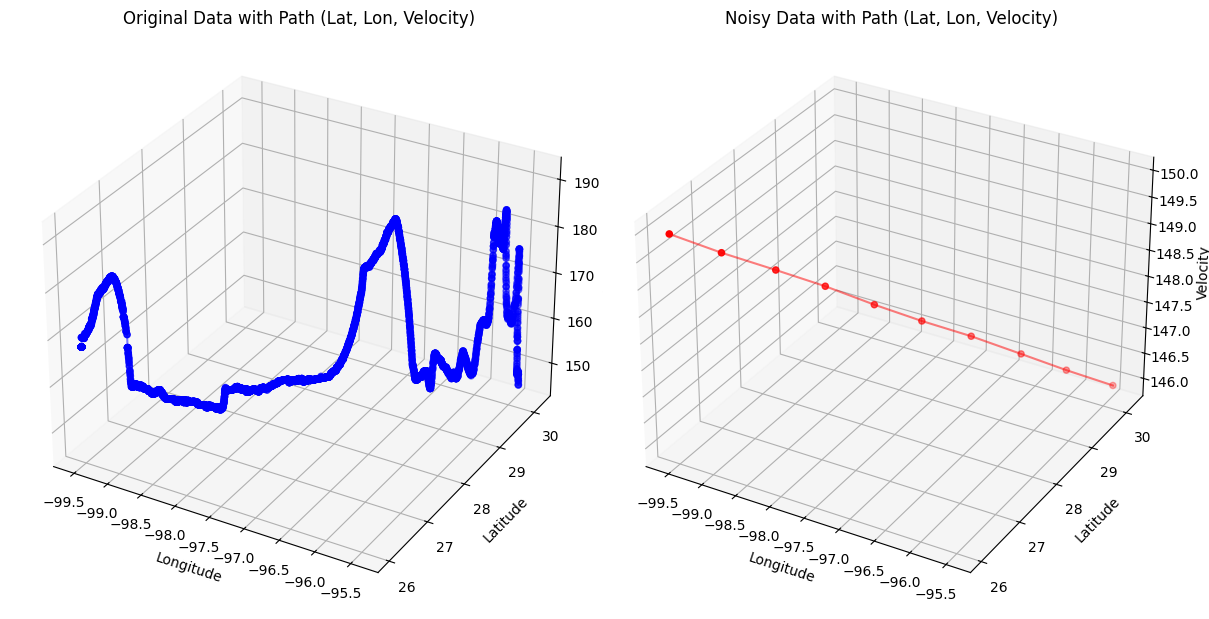

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import Akima1DInterpolator

# Generate original data for lat, lon, and velocity
num_points = 10

print(convered_flight['lat'].head(1).values[0])

np.random.seed(42)
lat_noisy = np.linspace(convered_flight['lat'].head(1).values[0], convered_flight['lat'].tail(1).values[0], num_points) \
                + np.random.normal(0, 0.02, num_points)

lon_noisy = np.linspace(convered_flight['lon'].head(1).values[0], convered_flight['lon'].tail(1).values[0], num_points) \
                + np.random.normal(0, 0.02, num_points)

velocity_noisy = np.linspace(convered_flight['velocity'].head(1).values[0], convered_flight['velocity'].tail(1).values[0], num_points) \
                + np.random.normal(0, 0.02, num_points)

# Ensure lat_noisy is sorted and apply the same sorting order to lon_noisy and velocity_noisy
sorting_order = np.argsort(lat_noisy)
lat_noisy = lat_noisy[sorting_order]
lon_noisy = lon_noisy[sorting_order]
velocity_noisy = velocity_noisy[sorting_order]

# Create Akima interpolators for noisy data
akima_interpolator_lat = Akima1DInterpolator(lat_noisy, lat_noisy)
akima_interpolator_lon = Akima1DInterpolator(lat_noisy, lon_noisy)
akima_interpolator_velocity = Akima1DInterpolator(lat_noisy, velocity_noisy)

# Generate smoothed interpolated points for noisy data
num_interpolated_points = 100
lat_interpolated = np.linspace(min(lat_noisy), max(lat_noisy), num_interpolated_points)
lon_interpolated = akima_interpolator_lon(lat_interpolated)
velocity_interpolated = akima_interpolator_velocity(lat_interpolated)

# Create 3D plots for original and noisy data with paths
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot original data with path
ax1.scatter(convered_flight['lon'], convered_flight['lat'], convered_flight['velocity'], c='blue', label='Original Data')
ax1.plot(convered_flight['lon'], convered_flight['lat'], convered_flight['velocity'], c='blue', alpha=0.5, label='Path')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Velocity')
ax1.set_title('Original Data with Path (Lat, Lon, Velocity)')

# Plot noisy data with path
ax2.scatter(lon_noisy, lat_noisy, velocity_noisy, c='red', label='Noisy Data')
ax2.plot(lon_noisy, lat_noisy, velocity_noisy, c='red', alpha=0.5, label='Path')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Velocity')
ax2.set_title('Noisy Data with Path (Lat, Lon, Velocity)')

plt.tight_layout()
plt.show()